# Random Forest

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv

En este conjunto de datos encontrarás las siguientes variables:
* Pregnancies. Número de embarazos del paciente (numérico)
* Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
* BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)
* SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
* Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
* BMI. Índice de masa corporal (numérico)
* DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)
* Age. Edad del paciente (numérico)
* Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)


## EDA (Mismo que para Decision Tree)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df = pd.read_csv(url)

print("Shape: ", df.shape)
df.head(5).T

Shape:  (768, 9)


,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,0.000,23.000,35.000
Insulin,0.000,0.000,0.000,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


In [3]:
# Parece ser que todos nuestros datos son numéricos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
# Como todas son numéricas primero queremos saber si entre sí están muy correlacionadas
variables = df.drop(['Outcome'], axis = 1)
objective = df['Outcome']

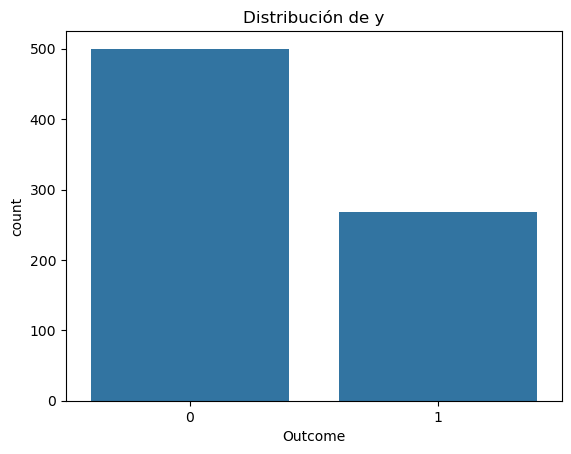

In [6]:
# Veamos qué tan distribuída está nuestra variable y - Outcome
objective.value_counts(normalize=True).rename('proportion')
sns.countplot(x=objective, data = variables)
plt.title("Distribución de y")
plt.show()

In [7]:
# No están tan desbalanceadas como en el ejercicio de mi primer modelo de ML
cols = variables.columns

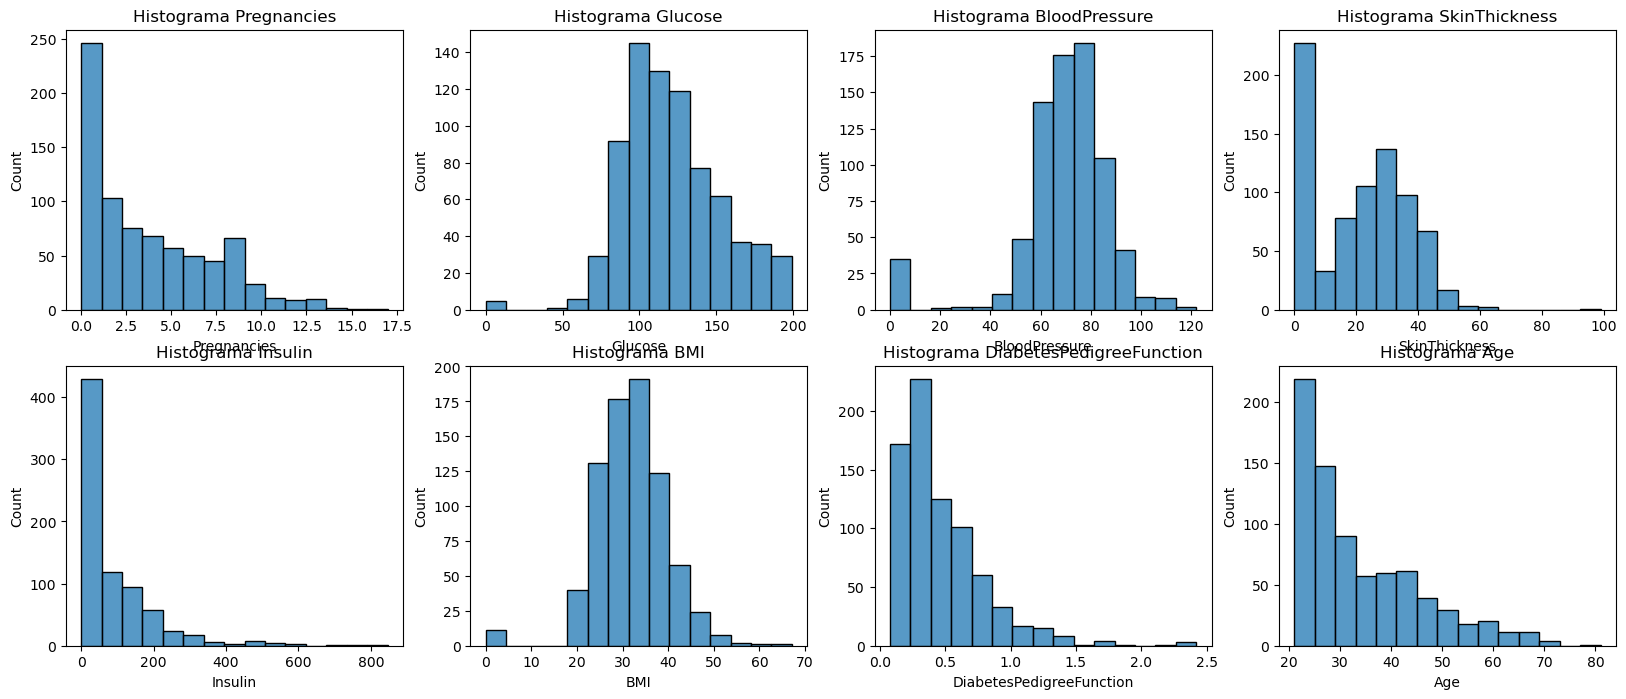

In [8]:
fig, axes = plt.subplots(2, 4, figsize = (20,8))
axes = axes.flatten()

for i, c in enumerate(cols):
    sns.histplot(variables[c].dropna(), bins = 15, ax = axes[i])
    axes[i].set_title(f"Histograma {c}")

### Relación bivariada con la variable objetivo

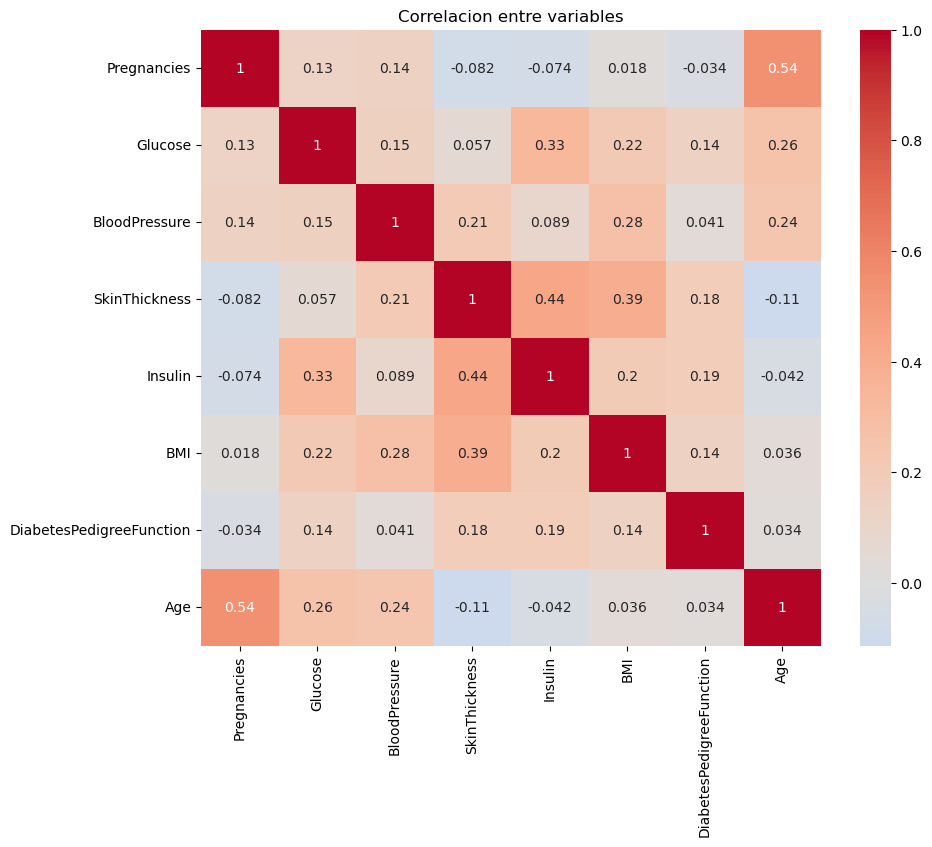

In [9]:
corr = variables.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, cmap="coolwarm", center=0)
plt.title("Correlacion entre variables")
plt.show()

In [10]:
# ninguna es mayor al 75% entonces por el momento no eliminaré ninguna
# Numéricas -> Tasa por cuantiles
def rate_by_quantiles(col, q=5):
    bins=pd.qcut(df[col], q=q, duplicates='drop')
    return (df.groupby(bins)['Outcome']
            .apply(lambda s: (s==1).mean())
            .sort_values(ascending=False))

# cada print corresponde a un intervalo de la variable
# el valor es la proporción de 'yes' en ese intervalo
for c in cols:
    print(c)
    display(rate_by_quantiles(c))


Pregnancies


/var/folders/9q/4vyvhr556tx36kq347pwfvf80000gn/T/ipykernel_57688/1506199538.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['Outcome']


Pregnancies
(7.0, 17.0]      0.564516
(4.0, 7.0]       0.407895
(2.0, 4.0]       0.349650
(-0.001, 1.0]    0.272358
(1.0, 2.0]       0.184466
Name: Outcome, dtype: float64

Glucose


/var/folders/9q/4vyvhr556tx36kq347pwfvf80000gn/T/ipykernel_57688/1506199538.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['Outcome']


Glucose
(147.0, 199.0]    0.743243
(125.0, 147.0]    0.442953
(109.0, 125.0]    0.305732
(95.0, 109.0]     0.194805
(-0.001, 95.0]    0.087500
Name: Outcome, dtype: float64

BloodPressure


/var/folders/9q/4vyvhr556tx36kq347pwfvf80000gn/T/ipykernel_57688/1506199538.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['Outcome']


BloodPressure
(82.0, 122.0]     0.474074
(74.0, 82.0]      0.382716
(68.0, 74.0]      0.366013
(60.0, 68.0]      0.293750
(-0.001, 60.0]    0.246835
Name: Outcome, dtype: float64

SkinThickness


/var/folders/9q/4vyvhr556tx36kq347pwfvf80000gn/T/ipykernel_57688/1506199538.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['Outcome']


SkinThickness
(35.0, 99.0]      0.468966
(27.0, 35.0]      0.388535
(-0.001, 18.0]    0.312500
(18.0, 27.0]      0.267123
Name: Outcome, dtype: float64

Insulin


/var/folders/9q/4vyvhr556tx36kq347pwfvf80000gn/T/ipykernel_57688/1506199538.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['Outcome']


Insulin
(150.0, 846.0]    0.516340
(-0.001, 72.2]    0.314534
(72.2, 150.0]     0.285714
Name: Outcome, dtype: float64

BMI


/var/folders/9q/4vyvhr556tx36kq347pwfvf80000gn/T/ipykernel_57688/1506199538.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['Outcome']


BMI
(37.8, 67.1]      0.513158
(30.1, 33.7]      0.450331
(33.7, 37.8]      0.431373
(25.9, 30.1]      0.267516
(-0.001, 25.9]    0.090323
Name: Outcome, dtype: float64

DiabetesPedigreeFunction


/var/folders/9q/4vyvhr556tx36kq347pwfvf80000gn/T/ipykernel_57688/1506199538.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['Outcome']


DiabetesPedigreeFunction
(0.687, 2.42]     0.496732
(0.454, 0.687]    0.363636
(0.303, 0.454]    0.337662
(0.219, 0.303]    0.326797
(0.077, 0.219]    0.220779
Name: Outcome, dtype: float64

Age


/var/folders/9q/4vyvhr556tx36kq347pwfvf80000gn/T/ipykernel_57688/1506199538.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return (df.groupby(bins)['Outcome']


Age
(42.6, 81.0]      0.532468
(33.0, 42.6]      0.457143
(27.0, 33.0]      0.429577
(23.0, 27.0]      0.238994
(20.999, 23.0]    0.132948
Name: Outcome, dtype: float64

Con lo obtenido en el EDA creo que todas las variables son una buena selección para entrenar al modelo.

In [11]:
from sklearn.model_selection import train_test_split

# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(variables, objective, test_size=0.2, random_state=12)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# entrenar y probar modelo con distintos hiperparametros
# listas para guardar resultados
n_estimators_list = [50, 100, 200]
max_depth_list = [None, 5, 10]
resultados = []

# probar combinaciones
for n in n_estimators_list:
    for depth in max_depth_list:
        rf = RandomForestClassifier(
            n_estimators=n,
            max_depth=depth,
            random_state=12,
            n_jobs=-1
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        resultados.append((n, depth, acc))
        print(f"n_estimators={n}, max_depth={depth} → Precisión: {acc:.4f}")

n_estimators=50, max_depth=None → Precisión: 0.7987
n_estimators=50, max_depth=5 → Precisión: 0.7857
n_estimators=50, max_depth=10 → Precisión: 0.7922
n_estimators=100, max_depth=None → Precisión: 0.8052
n_estimators=100, max_depth=5 → Precisión: 0.7857
n_estimators=100, max_depth=10 → Precisión: 0.7857
n_estimators=200, max_depth=None → Precisión: 0.8182
n_estimators=200, max_depth=5 → Precisión: 0.8052
n_estimators=200, max_depth=10 → Precisión: 0.8052


In [17]:
# convertir resultados a df
df_resultados = pd.DataFrame(resultados, columns=["n_estimators", "max_depth", "accuracy"])

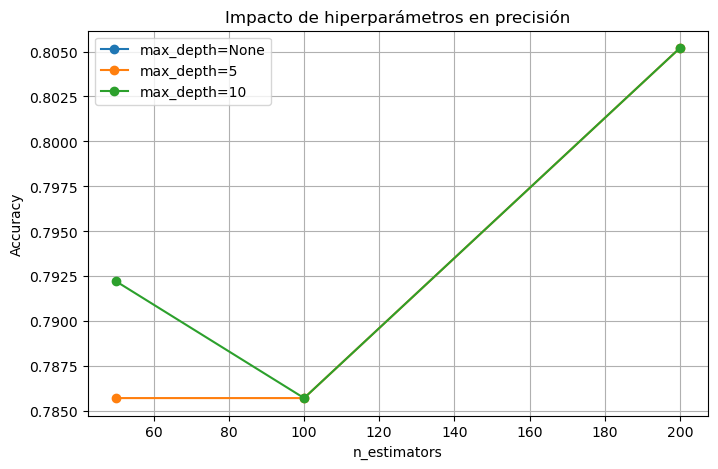

In [18]:
# graficamos resultados
plt.figure(figsize=(8,5))
for depth in max_depth_list:
    subset = df_resultados[df_resultados["max_depth"] == depth]
    plt.plot(subset["n_estimators"], subset["accuracy"], marker='o', label=f"max_depth={depth}")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Impacto de hiperparámetros en precisión")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# seleccionamos la mejor combinación
mejor = df_resultados.loc[df_resultados["accuracy"].idxmax()]
mejor_n = mejor["n_estimators"]
mejor_depth = mejor["max_depth"]
mejor

n_estimators    200.000000
max_depth              NaN
accuracy          0.818182
Name: 6, dtype: float64

In [22]:
# Entrenar de nuevo con los mejores hiperparámetros
mejor_modelo = RandomForestClassifier(
    n_estimators=int(mejor_n),
    max_depth=None if pd.isna(mejor_depth) else int(mejor_depth),
    random_state=12,
    n_jobs=-1
)
mejor_modelo.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=12)

In [ ]:
y_pred = mejor_modelo.predict(X_test)

In [24]:
print("Exactitud:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Exactitud: 0.8181818181818182

Matriz de confusión:
 [[89 10]
 [18 37]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86        99
           1       0.79      0.67      0.73        55

    accuracy                           0.82       154
   macro avg       0.81      0.79      0.79       154
weighted avg       0.82      0.82      0.81       154



In [15]:
# importancia de las variables

importancia = pd.DataFrame({
    'Variable': variables.columns,
    'Importancia': rf.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print("\nImportancia de variables:\n", importancia)


Importancia de variables:
                    Variable  Importancia
1                   Glucose     0.261056
5                       BMI     0.161069
7                       Age     0.134998
6  DiabetesPedigreeFunction     0.126371
2             BloodPressure     0.084691
4                   Insulin     0.080113
0               Pregnancies     0.077985
3             SkinThickness     0.073718


In [25]:
import joblib

# guardamos modelo
joblib.dump(mejor_modelo, "modelo_random_forest.pkl")
print("Modelo guardado como 'modelo_random_forest.pkl'")

Modelo guardado como 'modelo_random_forest.pkl'
